In [1]:
import pandas as pd
import numpy as np
#from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re 
import glob
from collections import Counter

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

In [21]:
pd.read_csv('/home/piah/Dokumente/Uni/Projektarbeit/Projektarbeit_LyrikGattungszuweisung/corpus/csv_delta/hauptcorpus_ballade.csv')

,Unnamed: 0,text,ID,Gattung
0,0,die zoologe von berlin hören ihr kind wie es...,DerZoologeVonBerlin,Ballade
1,1,die geierpfiff » nun still du an die dohne...,DerGeierpfiff,Ballade
2,2,die mutter wiederkehr du frägst ich immer von ...,DerMutterWiederkehr,Ballade
3,3,johanna gray lady gray fahren auf von+die schl...,JohannaGray,Ballade
4,4,brigitte b eine jung mädchen kommen nach bad...,BrigitteB.,Ballade
...,...,...,...,...
158,158,die weiß elefant die könig von siam mahawasa...,DerWeisseElefant,Ballade
159,159,auf die rhein eine fischer sitzen in+die kahne...,AufDemRhein,Ballade
160,160,eine edelkind sehen von+die balkon eine ed...,NaN,Ballade
161,161,die totentanz die türmer die schauen zumitte...,Totentanz,Ballade


In [23]:
z = pd.read_csv('/home/piah/Dokumente/Uni/Projektarbeit/Projektarbeit_LyrikGattungszuweisung/corpus/results/delta/zscores_hauptcorpus_gesamt.csv')
# ind = []
# for i, row in z.iterrows():
#     ind.append(str('lyrik_' + row['Unnamed: 0'].split('_')[2] + '_' + row['Unnamed: 0'].split('_')[3]))
z.index = list(z['Unnamed: 0'])
z.drop('Unnamed: 0', axis=1, inplace=True)
# z.to_csv('../results/delta/zscores_lyrik.csv')
z

,in+die,zu+die,an+die,herz,von+die,stehen,nacht,schön,alt,kind,...,rascheln,erschallen,stück,erfahren,seidne,außen,schos,zitterer,geschliffnen,prophezeien
Lyrik_0,0.321229,-0.703076,-0.639142,-0.510189,-0.576919,-0.486800,-0.328023,-0.348833,-0.353856,-0.410823,...,-0.100482,-0.160458,-0.161257,-0.128983,-0.077751,-0.066815,-0.066815,-0.066815,-0.066815,-0.066815
Lyrik_1,-0.457878,-0.703076,-0.639142,-0.510189,-0.576919,-0.486800,-0.328023,-0.348833,0.720223,-0.410823,...,-0.100482,-0.160458,-0.161257,-0.128983,-0.077751,-0.066815,-0.066815,-0.066815,-0.066815,-0.066815
Lyrik_2,-1.197031,-0.703076,-0.639142,-0.510189,-0.576919,-0.486800,-0.328023,-0.348833,-0.353856,-0.410823,...,-0.100482,-0.160458,-0.161257,-0.128983,-0.077751,14.899814,14.899814,-0.066815,-0.066815,-0.066815
Lyrik_3,-1.197031,-0.703076,-0.639142,-0.510189,-0.576919,2.517227,12.427988,2.073189,-0.353856,-0.410823,...,-0.100482,-0.160458,-0.161257,-0.128983,-0.077751,-0.066815,-0.066815,-0.066815,-0.066815,-0.066815
Lyrik_4,-1.197031,-0.703076,5.622203,-0.510189,-0.576919,-0.486800,2.370364,-0.348833,-0.353856,-0.410823,...,-0.100482,-0.160458,-0.161257,-0.128983,-0.077751,-0.066815,-0.066815,-0.066815,-0.066815,-0.066815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ballade_158,0.005873,0.017166,-0.290545,0.000720,0.111612,-0.062248,-0.177791,0.335765,-0.353856,-0.410823,...,-0.100482,-0.160458,-0.161257,-0.128983,-0.077751,-0.066815,-0.066815,-0.066815,-0.066815,-0.066815
Ballade_159,0.313067,-0.250989,-0.639142,-0.082600,-0.576919,-0.486800,0.426365,-0.348833,0.085015,-0.410823,...,-0.100482,4.073594,-0.161257,-0.128983,-0.077751,-0.066815,-0.066815,-0.066815,-0.066815,-0.066815
Ballade_160,0.051316,-0.703076,-0.639142,-0.510189,6.568499,-0.486800,-0.328023,-0.348833,-0.353856,-0.410823,...,-0.100482,-0.160458,-0.161257,-0.128983,-0.077751,-0.066815,-0.066815,-0.066815,-0.066815,-0.066815
Ballade_161,-0.416814,2.216655,0.491378,-0.510189,-0.576919,-0.486800,0.159186,-0.348833,0.213019,-0.410823,...,-0.100482,-0.160458,-0.161257,-0.128983,-0.077751,-0.066815,-0.066815,-0.066815,-0.066815,-0.066815


In [24]:
epik = pd.read_csv('/home/piah/Dokumente/Uni/Projektarbeit/Projektarbeit_LyrikGattungszuweisung/corpus/results/delta/zscores_hauptcorpus_ballade.csv', index_col=[0])
alle = pd.concat([epik, z])
alle = alle.fillna(0)
alle.to_csv('/home/piah/Dokumente/Uni/Projektarbeit/Projektarbeit_LyrikGattungszuweisung/corpus/results/delta/zscores_hauptcorpus_alle.csv')

In [25]:
alle

,in+die,zu+die,an+die,von+die,stehen,alt,kind,herz,schön,könig,...,ruf,schauer,bächlein,glas,üppig,erben,außen,schos,geschliffnen,prophezeien
Ballade_0,-0.753809,-0.847972,-0.760822,-0.638941,0.350764,-0.385589,1.210961,-0.459149,0.478266,-0.319591,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ballade_1,-0.647816,-0.254418,0.448405,-0.172581,0.304745,-0.385589,-0.059732,-0.459149,-0.389856,-0.319591,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ballade_2,0.110818,-0.204690,1.368797,-0.070331,-0.018613,0.000798,0.507546,-0.078362,-0.389856,-0.319591,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ballade_3,-0.670448,1.702424,-0.436082,0.488234,0.477436,-0.385589,-0.454085,-0.081726,-0.389856,-0.041854,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ballade_4,-1.329202,0.189042,-0.760822,-0.638941,0.561813,0.444921,0.579392,0.768561,-0.389856,-0.319591,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ballade_158,0.005873,0.017166,-0.290545,0.111612,-0.062248,-0.353856,-0.410823,0.000720,0.335765,1.678510,...,-0.11153,-0.092837,-0.087129,-0.134592,-0.080901,-0.084194,-0.066815,-0.066815,-0.066815,-0.066815
Ballade_159,0.313067,-0.250989,-0.639142,-0.576919,-0.486800,0.085015,-0.410823,-0.082600,-0.348833,-0.269113,...,-0.11153,-0.092837,-0.087129,-0.134592,-0.080901,-0.084194,-0.066815,-0.066815,-0.066815,-0.066815
Ballade_160,0.051316,-0.703076,-0.639142,6.568499,-0.486800,-0.353856,-0.410823,-0.510189,-0.348833,-0.269113,...,-0.11153,-0.092837,-0.087129,-0.134592,-0.080901,-0.084194,-0.066815,-0.066815,-0.066815,-0.066815
Ballade_161,-0.416814,2.216655,0.491378,-0.576919,-0.486800,0.213019,-0.410823,-0.510189,-0.348833,-0.269113,...,-0.11153,-0.092837,-0.087129,-0.134592,-0.080901,-0.084194,-0.066815,-0.066815,-0.066815,-0.066815


### compare delta values for texts by same and different authors

In [26]:
data = pd.read_hdf('/home/piah/Dokumente/Uni/Projektarbeit/Projektarbeit_LyrikGattungszuweisung/corpus/results/delta/hauptcorpus_gesamt.h5')
data.head(1)

,manhattan,cosine,label,genres
Lyrik_0,0.0,1.0,same,Lyrik


In [27]:
def same_dif(delta):
    ax = sns.distplot(delta['cosine'][delta['label']=='different'], hist=False, label='different', color=(0.2, 0.3, 0.1))
    ax1 = sns.distplot(delta['cosine'][delta['label']=='same'], hist=False, label='same', color='g')
    ax.set(ylabel='Count')

    # Get the two lines from the axes to generate shading
    l1 = ax.lines[0]
    l2 = ax1.lines[0]

    # Get the xy data from the lines so that we can shade
    x1, y1 = l1.get_xydata().T
    x2, y2 = l2.get_xydata().T

    xmin = max(x1.min(), x2.min())
    xmax = min(x1.max(), x2.max())
    x = np.linspace(xmin, xmax, 100)
    y1 = np.interp(x, x1, y1)
    y2 = np.interp(x, x2, y2)
    y = np.minimum(y1, y2)
    ax.fill_between(x, y, color="grey", alpha = 0.3, hatch = '|')
    
    # uncomment to add cutoff border
#     cut = cutoff[cutoff['corpus']==corpus]['delta']
#     plt.axvline(float(cut), 0, 1) 
#     plt.savefig(mfw + '_' + corpus + '_' + 'same_different_cutoff')

    
#     plt.savefig(mfw + '_' + corpus + '_' + 'same_different_deltas')
    plt.legend()
    plt.show()

In [28]:
delta = pd.read_hdf('/home/piah/Dokumente/Uni/Projektarbeit/Projektarbeit_LyrikGattungszuweisung/corpus/results/delta/hauptcorpus_gesamt.h5')

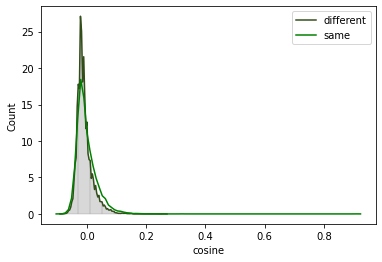

,manhattan,cosine,label,genres
Ballade_114,270.86,-0.02,different,Ballade
Ballade_158,275.83,0.02,different,Ballade
Lyrik_51,279.77,0.07,same,Lyrik
Ballade_42,280.67,0.04,different,Ballade
Ballade_65,282.56,0.06,different,Ballade
...,...,...,...,...
Lyrik_7,366.30,0.02,different,Lyrik
Lyrik_18,368.27,-0.01,different,Lyrik
Lyrik_2,379.50,-0.02,different,Lyrik
Lyrik_9,390.55,-0.02,different,Lyrik


In [29]:
delta = delta[delta.cosine!=1.00]
# mfw = file.replace(prefix, "").split('_')[0]
# corpus = file.replace(prefix, "").replace('.h5','').split('_')[2]
same_dif(delta)
#     if mfw == '1000':
#         same_dif(delta)

delta


In [ ]:
path = "project_stylometry_statistics/results/Chinese/delta/*.h5"
prefix = "project_stylometry_statistics/results/Chinese/delta/"
for file in glob.glob(path):
    delta = pd.read_hdf(file)
    delta = delta[delta.cosine!=1.00]
    mfw = file.replace(prefix, "").split('_')[0]
    corpus = file.replace(prefix, "").replace('.h5','').split('_')[2]
    same_dif(delta)
#     if mfw == '1000':
#         same_dif(delta)


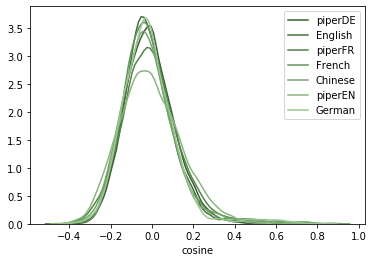

In [63]:
path = 'results/1000/*.h5'
prefix = 'results/1000'
for file in glob.glob(path):
    language = pd.read_hdf(file)
    language = language[language.cosine!=1.00]
    corp = file.replace('.h5', '').split('_')[2]
    sns.set_palette(sns.cubehelix_palette(7, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
    ax = sns.distplot(language['cosine'], hist=False, label=corp)
    plt.legend()
plt.savefig('delta_normaldist_1000mfw')

### Delta variance per corpus

In [115]:
v = delta.copy()
# v['corpus'] = 'Chinese'
v = v.drop('manhattan', axis=1)
v = v.drop('euclidean', axis=1)
v = v.drop('label', axis=1)
# v = v.drop('author', axis=1)
v = v.reset_index()
v = v.drop('index', axis=1)
v

,cosine,genres
0,0.00,lyrik
1,0.04,lyrik
2,0.06,lyrik
3,0.09,lyrik
4,0.02,lyrik
...,...,...
60757,0.04,epik
60758,0.08,epik
60759,-0.03,epik
60760,-0.02,epik


In [117]:
# variance = pd.DataFrame()
variance = pd.concat([variance, v])
variance = variance[variance['cosine']!=0.00]
variance

,cosine,genres
1,0.04,lyrik
2,0.06,lyrik
3,0.09,lyrik
4,0.02,lyrik
5,0.02,lyrik
...,...,...
60757,0.04,epik
60758,0.08,epik
60759,-0.03,epik
60760,-0.02,epik


In [9]:
import pandas as pd 
vdelta = pd.read_csv("delta_varianz_allekorpora")
vdelta = vdelta[vdelta.cosine!=1.00]
vdelta.sort_values(by=['corpus'], inplace=True)
vdelta

,Unnamed: 0,cosine,corpus
1,"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
3755,"YanGelin,LvXie,seg.txt",0.09,Chinese
3754,"YanGelin,LuFanYanShi,seg.txt",0.10,Chinese
3753,"JiaPingwa,QinQiang,seg.txt",0.32,Chinese
3752,"ChenZhongshi,ChuXia,seg.txt",0.40,Chinese
...,...,...,...
37703,"Cladel,Leon_OMPDRAILLES_Novel.txt",-0.03,pipierFR
37704,"Zola,Emile_LeventredeParis_Novel.txt",-0.07,pipierFR
37705,"Charriere,IsabelleDe_CalisteOuLettresDeLausann...",0.12,pipierFR
37641,"Dumas,Alexandre_OlympesDesCleves_Novel.txt",-0.01,pipierFR


In [10]:
cutoff = pd.read_csv("entire_best_cutoff.csv")
cutoff.sort_values(by=['corpus'], inplace=True)
cutoff                   

,Unnamed: 0,Unnamed: 0.1,fp,fn,percentage,delta,corpus,mfw
5,15,56,0.005766,0.003964,0.57,0.3382,Chinese,1000
2,6,48,0.002883,0.003964,0.49,0.2243,English,2000
1,10,64,0.004324,0.009730,0.65,0.3385,French,500
4,26,56,0.002883,0.003964,0.57,0.3040,German,1000
6,4,64,0.002416,0.002953,0.65,0.3955,piperDE,500
0,18,67,0.003311,0.005459,0.68,0.3996,piperEN,1000
3,18,68,0.004592,0.005828,0.69,0.4367,piperFR,500


Text(0, 0.5, 'cosine')

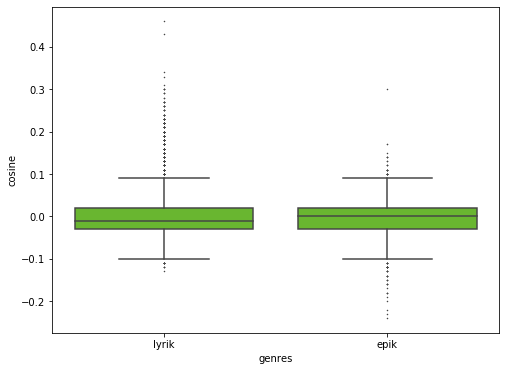

In [122]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='genres', y='cosine', data=delta, color=(0.4, 0.8, 0.1), fliersize=0.5)
# ax = sns.scatterplot(x='corpus', y='delta', data=cutoff, color='black', s=80, zorder=10)
plt.ylabel('cosine')
# plt.savefig("deltastreuung_plus_deltacutoff")

### Delta normal distribution

In [69]:
cutoff

,Unnamed: 0,Unnamed: 0.1,fp,fn,percentage,delta,corpus,mfw
0,18,67,0.003311,0.005459,0.68,0.3996,piperEN,1000
1,10,64,0.004324,0.009730,0.65,0.3385,French,500
2,6,48,0.002883,0.003964,0.49,0.2243,English,2000
3,18,68,0.004592,0.005828,0.69,0.4367,piperFR,500
4,26,56,0.002883,0.003964,0.57,0.3040,German,1000
5,15,56,0.005766,0.003964,0.57,0.3382,Chinese,1000
6,4,64,0.002416,0.002953,0.65,0.3955,piperDE,500


In [123]:
cos = delta.copy()
cos = cos[cos.cosine!=1.00]

In [124]:
plus_same = np.mean(cos[cos['label']=='same']['cosine']) + np.std(cos[cos['label']=='same']['cosine'])
minus_same = np.mean(cos[cos['label']=='same']['cosine']) - np.std(cos[cos['label']=='same']['cosine'])

plus_diff = np.mean(cos[cos['label']=='different']['cosine']) + np.std(cos[cos['label']=='different']['cosine'])
minus_diff = np.mean(cos[cos['label']=='different']['cosine']) - np.std(cos[cos['label']=='different']['cosine'])

print(plus_same, minus_same, plus_diff, minus_diff)

0.04451305977774847 -0.05296809497101655 0.03423736548476722 -0.03413231497971672


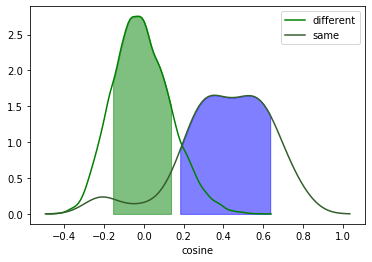

In [124]:
path = "project_stylometry_statistics/results/piperEN/delta/1000_delta_piperEN.h5"
prefix = "project_stylometry_statistics/results/piperEN/delta/"
corpus = 'piperEN'
def distplot(dist):
    ax = sns.distplot(dist['cosine'], hist=False, color='green')
    plt.savefig(mfw + '_' + corpus + '_delta_normaldist')
    plt.show()
    
import re
from scipy import stats


numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

        
        
for file in sorted(glob.glob(path), key=numericalSort):
    dist = pd.read_hdf(file)
    mfw = file.replace(prefix,'').split('_')[0]
    dist = dist[dist['cosine']!=1.00]

    #distplot(dist)
    #sns.set_palette("summer")
    sns.set_palette(sns.cubehelix_palette(14, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
#     ax = sns.distplot(dist['cosine'], hist=False, label=mfw)    #visualise all mfw steps

    #visualise same and different curve for one mfw step with quartile
    ax = sns.distplot(dist[dist['label']=='different']['cosine'], hist=False, label='different', color='g')
    kde = stats.gaussian_kde(dist[dist['label']=='different']['cosine'])
    shade = np.linspace(minus_diff, plus_diff, 300)
    plt.fill_between(shade, kde(shade), alpha=0.5, color='green')
    
    ax = sns.distplot(dist[dist['label']=='same']['cosine'], hist=False, label='same')
    kde = stats.gaussian_kde(dist[dist['label']=='same']['cosine'])
    shade = np.linspace(minus_same, plus_same, 300)
    plt.fill_between(shade, kde(shade), alpha=0.5, color='blue')
    
    
    plt.legend()
plt.savefig(corpus + '_delta_normaldist_quartile_MFW1000')

In [66]:
cutoff = pd.read_csv("project_stylometry_statistics/entire_best_cutoff.csv")

In [21]:
#vdelta = pd.DataFrame()
deltas = pd.read_hdf("project_stylometry_statistics/results/piperDE/delta/500_delta_piperDE.h5")
deltas.drop('manhattan', axis=1, inplace=True)
deltas.drop('euclidean', axis=1, inplace=True)
deltas.drop('label', axis=1, inplace=True)
deltas.drop('author', axis=1, inplace=True)
deltas['corpus']='piperDE'
vdelta=pd.concat([vdelta, deltas])
vdelta

,cosine,corpus
"BiShuMin,HuaGuanBingDu,seg.txt",1.00,Chinese
"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
"YvQiuyv,ShuangLengChangHe,seg.txt",0.27,Chinese
"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",0.20,Chinese
"YvQiuyv,XingZheWuJiang,seg.txt",0.24,Chinese
...,...,...
"Ehrmann,Marianne_Amalie.EinewahreGeschichteinBriefen_Novel.txt",-0.35,piperDE
"Fischer,CarolineAuguste_Margarethe_Novel.txt",-0.34,piperDE
"Reventlow,Franziska_VonPaulzuPedro_Novel.txt",-0.23,piperDE
"Fischer,CarolineAuguste_DieHonigmonathe_Novel.txt",-0.37,piperDE


In [35]:
vdelta.to_csv("delta_varianz_allekorpora")

In [41]:
vdelta = pd.read_csv("delta_varianz_allekorpora")
vdelta = vdelta[vdelta.cosine!=1.00]
vdelta

,Unnamed: 0,cosine,corpus
1,"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
2,"YvQiuyv,ShuangLengChangHe,seg.txt",0.27,Chinese
3,"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",0.20,Chinese
4,"YvQiuyv,XingZheWuJiang,seg.txt",0.24,Chinese
5,"YvQiuyv,WenHuaKuLv,seg.txt",0.13,Chinese
...,...,...,...
90296,"Ehrmann,Marianne_Amalie.EinewahreGeschichteinB...",-0.35,piperDE
90297,"Fischer,CarolineAuguste_Margarethe_Novel.txt",-0.34,piperDE
90298,"Reventlow,Franziska_VonPaulzuPedro_Novel.txt",-0.23,piperDE
90299,"Fischer,CarolineAuguste_DieHonigmonathe_Novel.txt",-0.37,piperDE


In [64]:
german = vdelta[vdelta['corpus']=='German']
chinese = vdelta[vdelta['corpus']=='Chinese']
french = vdelta[vdelta['corpus']=='French']
english = vdelta[vdelta['corpus']=='English']
piperDE = vdelta[vdelta['corpus']=='piperDE']
piperFR = vdelta[vdelta['corpus']=='pipierFR']
piperFR.corpus='piperFR'
piperEN = vdelta[vdelta['corpus']=='piperEN']
liste = [german, chinese, french, english, piperDE, piperEN, piperFR]

/home/teresa/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


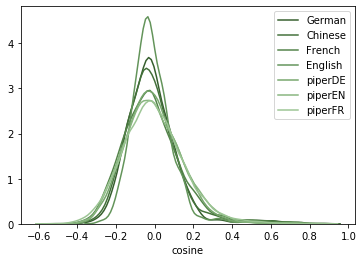

In [65]:
for language in liste:
    corp = np.unique(language['corpus'])[0]
    sns.set_palette(sns.cubehelix_palette(7, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
    ax = sns.distplot(language['cosine'], hist=False, label=corp)
    plt.legend()
plt.savefig('_delta_normaldist_best_cutoffs')

In [1]:
import pandas as pd

In [26]:
data = pd.read_hdf('/home/piah/Dokumente/Uni/Projektarbeit/Projektarbeit_LyrikGattungszuweisung/corpus/results/delta/hauptcorpus_gesamt.h5')
data.head()

,manhattan,cosine,label,genres
Lyrik_0,0.00,1.00,same,Lyrik
Ballade_114,270.86,-0.02,different,Ballade
Ballade_158,275.83,0.02,different,Ballade
Lyrik_51,279.77,0.07,same,Lyrik
Ballade_42,280.67,0.04,different,Ballade


In [27]:
data = data.sort_values(by='cosine', ascending=False)
data = data[data.cosine!=1.00]
data.head(1)

,manhattan,cosine,label,genres
Lyrik_28,135.65,0.91,same,Lyrik


In [28]:
cut = data[data.cosine>=0.35]
cut

,manhattan,cosine,label,genres
Lyrik_28,135.65,0.91,same,Lyrik
Lyrik_52,135.65,0.91,same,Lyrik


In [29]:
dic = {'Korpus': 'autoren','Gesamt':len(data),'same genre': len(cut[cut.label=='same']), 'different genre': len(cut[cut.label=='different'])}
res = pd.DataFrame.from_dict(dic, orient='index')
res = res.T
res

,Korpus,Gesamt,same genre,different genre
0,angepasst,49952,2,0


In [30]:
cutoff = res
cutoff = pd.concat([cutoff, res])
cutoff

,Korpus,Gesamt,same genre,different genre
0,angepasst,49952,2,0
0,angepasst,49952,2,0


In [31]:
cutoff.to_csv('/home/piah/Dokumente/Uni/Projektarbeit/Projektarbeit_LyrikGattungszuweisung/corpus/results/delta/cutoff_all.csv')

In [32]:
#c = cutoff[['Korpus', ]]
#c.columns = ['Korpus', 'result']
#c['same_dif'] = ['different author', 'different author','different author','different author','different author']

c2 = cutoff[['Korpus', 'different genre']]
c2.columns = ['Korpus', 'result']
c2['same_dif'] = ['different genre', 'different genre']

#f = cutoff[['Korpus', 'same author']]
#f.columns = ['Korpus', 'result']
#f['same_dif'] = ['same_author','same_author','same_author','same_author','same_author']

f2 = cutoff[['Korpus', 'same genre']]
f2.columns = ['Korpus', 'result']
f2['same_dif'] = ['same genre','same genre']


cutoffs = pd.concat([c2, f2])
cutoffs

<ipython-input-32-413257aa7dd0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2['same_dif'] = ['different genre', 'different genre']
<ipython-input-32-413257aa7dd0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f2['same_dif'] = ['same genre','same genre']


,Korpus,result,same_dif
0,angepasst,0,different genre
0,angepasst,0,different genre
0,angepasst,2,same genre
0,angepasst,2,same genre


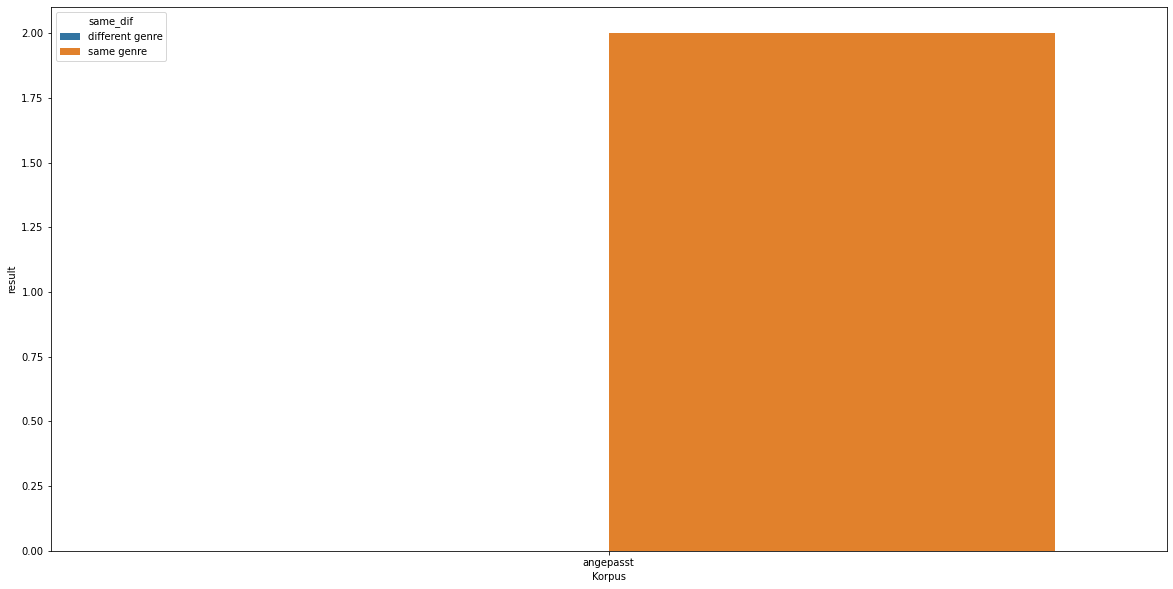

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.barplot(x='Korpus', y='result', hue='same_dif', data=cutoffs)
plt.savefig('/home/piah/Dokumente/Uni/Projektarbeit/Projektarbeit_LyrikGattungszuweisung/corpus/results/delta/cutoff_all')

In [197]:
data2 = data[:100]
i=0
for x, row in data2.iterrows():
    data2.loc[x,'Autor']= str(row.author) + str(i)
    i+=1 
data2

/home/teresa/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/teresa/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,manhattan,cosine,labelgenre,labelauthor,genres,author,Autor
lyrik_lemma_wilhelm dunker._l0030005,9.69,0.99,same,different,lyrik,wilhelm dunker.,wilhelm dunker.0
lyrik_lemma_fontane_Johanna Gray,5.42,0.99,same,same,lyrik,fontane,fontane1
lyrik_lemma_wilhelm duncker._l0040109,9.69,0.99,same,different,lyrik,wilhelm duncker.,wilhelm duncker.2
lyrik_lemma_fontane_l0090073,3.39,0.99,same,same,lyrik,fontane,fontane3
lyrik_lemma_fontane_Der alte Derffling,3.39,0.99,same,same,lyrik,fontane,fontane4
...,...,...,...,...,...,...,...
lyrik_lemma_fontane_Jan Bart,139.26,0.79,same,same,lyrik,fontane,fontane95
lyrik_lemma_hermann allmers._l0050230,118.67,0.78,same,same,lyrik,hermann allmers.,hermann allmers.96
lyrik_lemma_hermann allmers._l0040005,118.67,0.78,same,same,lyrik,hermann allmers.,hermann allmers.97
lyrik_lemma_holz_l00140061,89.66,0.77,same,same,lyrik,holz,holz98


In [34]:
data2 = data[:100]
i=0
for x, row in data2.iterrows():
    if 'epik' in row.genres:
        data2.loc[x,'Genre']= 'Ballade'
    else:
        data2.loc[x,'Genre']= 'Lyrik'

    i+=1 
data2

/home/piah/.local/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/piah/.local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,manhattan,cosine,label,genres,Genre
Lyrik_28,135.65,0.91,same,Lyrik,Lyrik
Lyrik_52,135.65,0.91,same,Lyrik,Lyrik
Ballade_78,215.25,0.32,same,Ballade,Lyrik
Ballade_40,215.25,0.32,same,Ballade,Lyrik
Ballade_85,228.86,0.26,different,Ballade,Lyrik
...,...,...,...,...,...
Lyrik_24,337.13,0.15,different,Lyrik,Lyrik
Ballade_60,277.85,0.15,same,Ballade,Lyrik
Ballade_1,239.65,0.15,same,Ballade,Lyrik
Ballade_5,235.65,0.15,same,Ballade,Lyrik


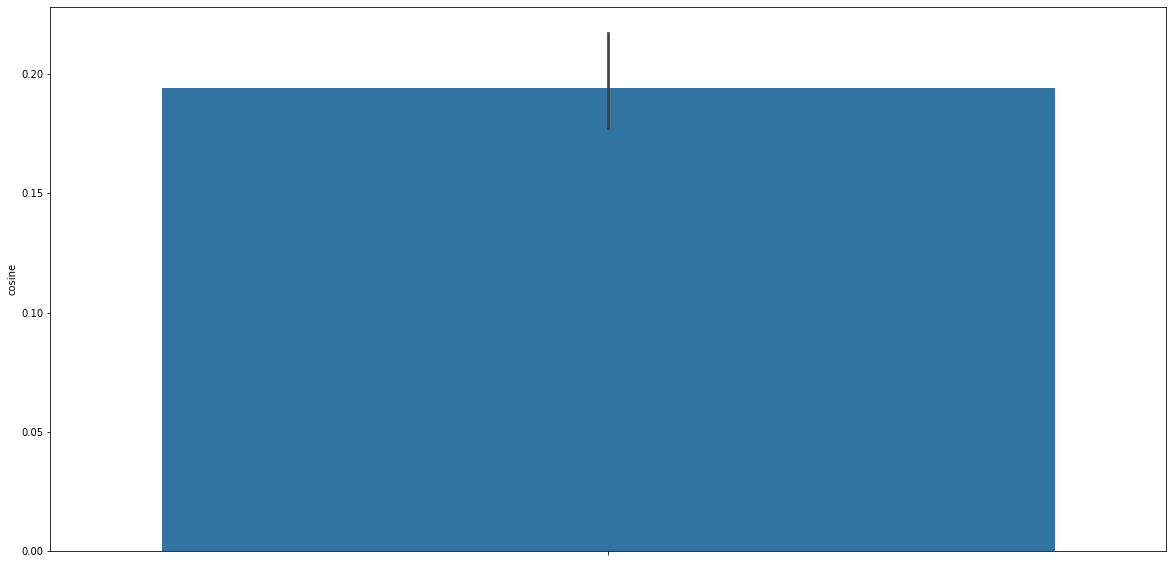

In [36]:
plt.figure(figsize=(20,10))
sns.barplot( y='cosine', data=data2[:100], hue='genres')
# plt.title(title)
plt.savefig('/home/piah/Dokumente/Uni/Projektarbeit/Projektarbeit_LyrikGattungszuweisung/Arbeit/Bilder/vergleich_100cos_gattung.png')
plt.xticks(rotation=90)
plt.show()

In [37]:
emotion = ['liebreich','angst', 'ängstlich', 'trauer', 'traurig', 'zornig', 'zorn', 'verachtungsvoll', 'verachtung',
           'schuld', 'schuldig', 'liebe',  'geliebt', 'liebevoll', 'stolz', 'scham', 'schämen', 'überrasschung',
           'überrascht', 'sorge', 'sorgenvoll', 'ekel', 'ekeln', 'angeekelt', 'neid', 'neidisch', 'neidvoll',
           'glücklich', 'glück', 'freude', 'freudig', 'freuen', 'erleichterung', 'erleichtert', 'vergnügt', 'vergnügen',
           'zufrieden', 'zufriedenheit', 'verzweiflung', 'verzweifelt', 'verlegenheit', 'verlegen', 'aufregung',
           'aufgeregt', 'aufregen', 'spannung', 'gespannt', 'erregung', 'erregt', 'hoffen', 'hoffnung', 'befriedigt',
           'langweilig', 'langeweile', 'mitgefühl', 'mitfühlen', 'enttäuscht', 'enttäuschung', 'frust', 'frustriert',
           'eifersucht', 'eifersüchtig', 'wut', 'wütend', 'reue', 'schock', 'schockiert', 'zuneigung', 'verärgert',
           'verärgerung', 'erwartungsvoll', 'erwartung', 'vorfreude', 'scheu', 'gelassen', 'gelassenheit', 'mut',
           'mutig', 'neugierde', 'neugierig', 'depression', 'depressiv', 'niedergeschlagenheit', 'niedergeschlagen',
           'lustvoll', 'lust', 'rausch', 'einfühlend', 'einfühlsam', 'euphorisch', 'euphorie', 'dankbarkeit', 'dankbar',
           'hass', 'entsetzt', 'entsetzen', 'demütigung', 'demütig', 'demut', 'interesse', 'interessiert', 'einsamkeit',
           'einsam', 'empörung', 'empört', 'vertrauen', 'qualvoll', 'qual', 'gleichgültigkeit', 'gleichgültig',
           'fröhlichkeit', 'fröhlich', 'schadenfroh', 'schadenfreude', 'schmerz', 'melancholie', 'melancholisch',
           'panik', 'panisch', 'fühlen', 'herz', 'seele', 'schwermut', 'unglück', 'wanderlust',  'bitterkeit','freuen', 
           'weinen',  'erschrecken',  'empfinden', 'vergnügen', 'bekümmern', 'befürchten', 'jauchzen', 'verzweifeln', 
           'qual', 'grausne', 'Lust',  'kichern', 'zufrieden',  'leid', 'zorn',  'heiter', 'lache',  'weinen', 'sehnsucht',
           'hoffnung',  'mutig', 'trost', 'ohnmacht', 'ohnmächtig']

sprechmarker_lang = ['abhören','ablehnen','abraten','abschlagen','abschweifen','absprechen','abstreiten',
                     'andeuten','anerkennen', 'anfechten','angeben','ankünden','anraten',
                     'antworten','anvertrauen','anweisen','artikulieren','aufmuntern',
                     'aufzeigen','ausdrücken','Ausflüchte machen','ausforschen','ausfragen','aushorchen',
                     'ausplaudern','ausquetschen','aussagen', 'äußern', 'sich aussprechen','ausweichen',
                     'bedanken', 'befehlen','befragen','befürchten','begründen','beharren auf','behaupten',
                     'beichten','bejahen', 'bekennen', 'beklagen', 'bekräftigen', 'bekunden', 'beleuchten', 'bemängeln',
                     'bemerken', 'berichten', 'berichtigen', 'beruhigen', 'besagen', 'Bescheid geben', 'beschönigen',
                     'beschreiben','beschwören','bestätigen','bestehen auf','bestimmen','bestreiten','beten','beteuern',
                     'betonen','betteln','beweisen','bezeichnen','bezeugen','bitten','brabbeln','bramarbasieren',
                     'breittreten','brüllen','brummen','daherreden','darlegen','dartun','definieren',
                     'dementieren','demonstrieren', 'den Mund vollnehmen','deuteln','dick auftragen','dazwischenfahren',
                     'drohen', 'ein Ohr abkauen','einräumen','einreden','einschärfen','einwenden','einwilligen','empfehlen',
                     'entgegenhalten','entgegnen','enthüllen','entkräften','entschuldigen','erdichten','erfinden',
                     'ergänzen','erinnern','erklären','erkundigen', 'ermahnen','ermuntern','ermutigen','erörtern','erschließen',
                     'erwähnen', 'erwidern','erzählen','evident machen','fabulieren','faseln','feststellen',
                     'flehen','flunkern','flüstern','folgern','fordern','fragen', 'geheim halten',
                     'gestehen','herausposaunen','herausreden', 'herausschreien','herumkritteln','hervorheben','hinweisen',
                     'hinzufügen','höhnen','in Abrede stellen','in Frage stellen','ins Gesicht sagen',
                     'jammern','keuchen','klagen','klöhnen','konstatieren','krächzen','kritisieren','kundgeben',
                     'kundtun','labern','lallen','leugnen','lispeln','loben','mahnen','meinen','mitteilen',
                     'munkeln','murmeln','nachfragen','nachweisen','näseln','negieren','nennen',
                     'nuscheln','offenbaren','palavern','petzen','plaudern','plauschen','prahlen','quasseln','quatschen',
                     'raten','raunen','Rede und Antwort stehen','reden wie ein Buch','reden wie ein Wasserfall',
                     'reinen Wein einschenken','röcheln','rufen','sagen','schildern','schleimen','schließen',
                     'schluchzen','schnacken','schnarren','schnattern','schreien','schwadronieren','schwatzen',
                     'schwätzen','schwören','seiern','skizzieren','sprechen','stammeln','stottern','tadeln',
                     'trösten','tuscheln','überinterpretieren','überreden',
                     'überzeugen','umreißen','umschreiben','unken','Unsinn verzapfen','unterhalten','unterstreichen',
                     'unterstützen','veranschaulichen','verdrehen','verfälschen','verhören','verklickern',
                     'verkünden','verlangen','verlautbaren','verleugnen','vernehmen','verneinen','verraten','verschleiern',
                     'versichern','versprechen','vertiefen','verwerfen','verzerren','vorbringen','vorenthalten','vorgeben','warnen',
                     'weit ausholen','widerlegen','widerrufen','widersprechen','wiederholen','wissen wollen','zeigen',
                     'zitieren','zu bedenken geben','zugeben','zugestehen','zureden','zurücknehmen',
                     'zurufen','zustimmen', 'hören', 'singen', 'danken', 'grüßen', 'befehlen', 'lügen', 'gestehen', 'seufzen',
                     'stöhnen', 'staunen', 'zuhören', 'jubeln', 'schimpfen', 'wettern', 'krächzen']


In [71]:
zscores = pd.read_csv('/home/piah/Dokumente/Uni/Projektarbeit/Projektarbeit_LyrikGattungszuweisung/corpus/results/delta/zscores_Angepasst_Größe_groß_gesamt.csv', index_col=[0])
epik = zscores[zscores.index.str.contains('Ballade')]
print(len(epik))
epik.loc['Ballade'] = epik.sum(axis=0)/7

lyrik = zscores[zscores.index.str.contains('Lyrik')]
print(len(lyrik))
lyrik.loc['Lyrik'] = lyrik.sum(axis=0)/3131

result = pd.concat([lyrik.loc['Lyrik'], epik.loc['Ballade']], axis=1)
result = result.T

163
206


/home/piah/.local/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [72]:
result

,in+die,@ord@,zu+die,herz,an+die,von+die,nacht,himmel,kind,alt,...,lache|lachen,'re,fallend,saite,unterdessen,perle|perlen,jemals,zunge,abends,schaffend
Lyrik,-0.008383,0.012906,-0.004051,0.007273,-0.008412,-0.003844,0.002268,0.006740,-0.004276,-0.005541,...,0.000977,-0.003032,0.001899,0.004712,0.003121,0.003397,0.001606,0.002675,-0.004667,0.003067
Ballade,3.749456,-5.772463,1.811852,-3.252921,3.762746,1.719531,-1.014409,-3.014921,1.912455,2.478297,...,-0.437170,1.356125,-0.849342,-2.107627,-1.395789,-1.519491,-0.718266,-1.196619,2.087555,-1.371686


In [73]:
df = pd.DataFrame(columns=['Wort', 'Z-Score', 'Genre'])
wort = ''
zscore = []
genre = []
for i, row in result.iterrows():
    for m in sprechmarker_lang:
        if m in result.columns:
            wort+=' ' + m
            zscore.append(result.at[i, m])
            genre.append(i)
worte = wort.split(' ')
df['Wort'] = worte[1:]
df['Z-Score'] = zscore
df['Genre'] = genre
df = df.sort_values(by='Z-Score')
df

,Wort,Z-Score,Genre
24,singen,-1.738130,Ballade
13,bestimmen,-1.693170,Ballade
22,verlangen,-1.381576,Ballade
16,klagen,-1.218135,Ballade
23,zeigen,-0.052758,Ballade
6,rufen,-0.013134,Lyrik
7,schließen,-0.008642,Lyrik
1,flüstern,-0.008139,Lyrik
2,fragen,-0.007577,Lyrik
8,schreien,-0.007494,Lyrik


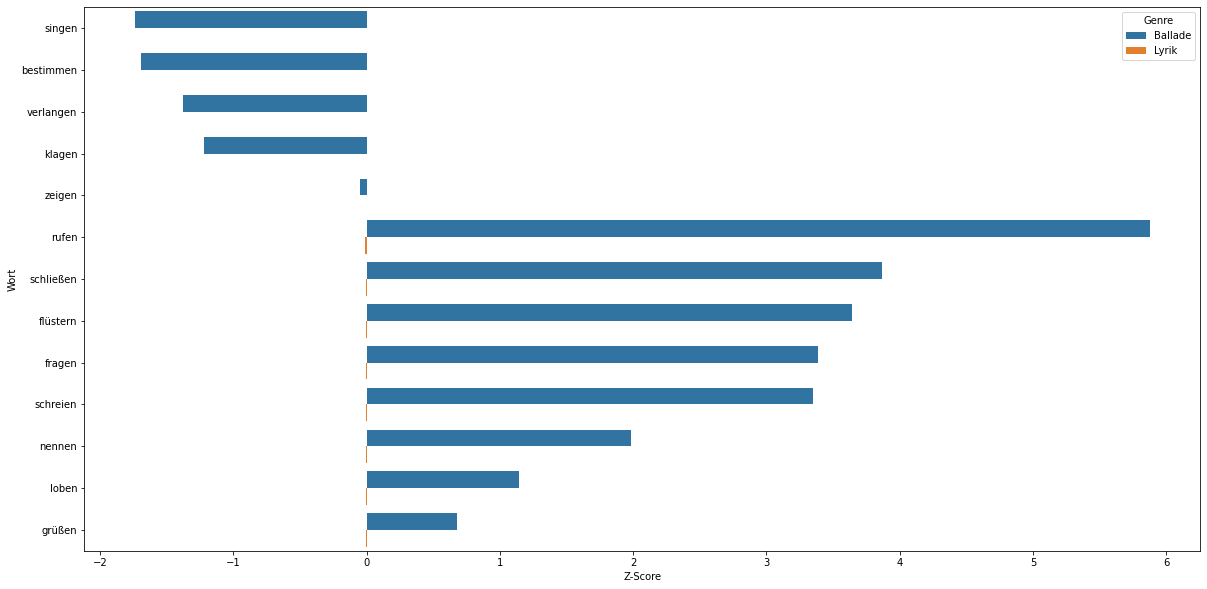

In [74]:
plt.figure(figsize=(20,10))
sns.barplot(x='Z-Score', y='Wort', hue='Genre',data=df)

plt.savefig('/home/piah/Dokumente/Uni/Projektarbeit/Projektarbeit_LyrikGattungszuweisung/Arbeit/Bilder/angepasst-gross_sprechmarker_zscores.png')